# Clinton and Trump tweets

This notebook prepares and collects data for this visu : https://bl.ocks.org/rhuille/89b683aecf83e14c5e620a9cd9bcc0fb

In [1]:
from pandas import *
from numpy import *
import matplotlib.pyplot as plt
import string
import urllib.request
from bs4 import BeautifulSoup 

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

Data from kaggle : https://www.kaggle.com/benhamner/clinton-trump-tweets

This script generates a dataset for this visualusation : http://bl.ocks.org/rhuille/89b683aecf83e14c5e620a9cd9bcc0fb

**I want to determine how many times some interesting words, such "economy" or "love", are used in this set of political tweets**

In [2]:
data = DataFrame.from_csv("tweets.csv")[["handle", "text", "time"]]
data.head()

,handle,text,time
id,,,
780925634159796224,HillaryClinton,The question in this election: Who can put the...,2016-09-28T00:22:34
780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",2016-09-27T23:45:00
780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,2016-09-27T23:26:40
780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",2016-09-27T23:08:41
780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,2016-09-27T22:30:27


Dates :

In [3]:
print("start:", min(data["time"]), "end:", max(data["time"]))

start: 2016-01-05T03:36:53 end: 2016-09-28T00:22:34


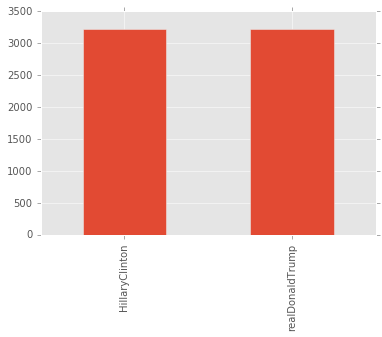

In [4]:
plt.figure()
data.handle.value_counts().plot.bar()
plt.show()

We have approximately 3,000 tweets from @HillaryClinton and @realDonaldTrump : 

In [5]:
print("@HillaryClinton :", data[data.handle == "HillaryClinton"].shape[0], "tweets")
print("@realDonaldTrump :", data[data.handle == "realDonaldTrump"].shape[0], "tweets")

@HillaryClinton : 3226 tweets
@realDonaldTrump : 3218 tweets


The number of tweets is the same for the 2 candidates. Consequently, we do not have to normalize by the total number of tweets for each candidate.

In [6]:
n_HillaryClinton = data[data.handle == "HillaryClinton"].shape[0]
n_realDonaldTrump = data[data.handle == "realDonaldTrump"].shape[0]

Here is the list of words I am interrested in : 

In [7]:
interesting_words ={
    "families": ["families", "family"],
    "economy" : ["economy"],
    "healthcare" : ["health", "healthcare"],
    "people":["person", "folks", "people"],
    "job":["job"],
    "energy" : ["energy"],
    "foreign" : ["foreign"],
    "justice": ["justice"],
    "women" : ["women", "woman", "wife"],
    "gun" : ["gun", "weapon"],
    "education" : ["education"],
    "love": ["love"],
    "dream": ["dream"],
    "hate":["hate", "hatred"],
    "violence": ["violence"],
    "money": ["money"],
    "terrorism": ["terrorism", "terrorist"],
    "taxes": ["tax", "taxes"],
    "business" : ["company", "firms", "companies", "firm", "business"],
    "trade" : ["trade"],
    "climate" : ["climate"]
}

list_words = []
for i in interesting_words:
    list_words += interesting_words[i]

In [8]:
ponctuation = set(string.punctuation + "”—“’’")

def contain(tweet):
    for word in list_words:
        if word in ''.join(ch for ch in tweet if ch not in ponctuation).lower().split(" "):
            return(True)
    return(False)

I keep the tweets containing these interesting words :

In [9]:
complete_HillaryClinton = []
for v,tweet in enumerate(data[data.handle == "HillaryClinton"].text):
    if contain(tweet):
        complete_HillaryClinton+= [{"text": tweet.replace("\n", " "), "time": data[data.handle=="HillaryClinton"].time.iloc[v][:10]}]
print("@HillaryClinton :", len(complete_HillaryClinton), "tweets")

complete_realDonaldTrump = []
for v,tweet in enumerate(data[data.handle == "realDonaldTrump"].text):
    if contain(tweet):
        complete_realDonaldTrump+= [{"text": tweet.replace("\n", " "), "time":data[data.handle=="realDonaldTrump"].time.iloc[v][:10]}]
print("@realDonaldTrump :", len(complete_realDonaldTrump), "tweets")

@HillaryClinton : 1010 tweets
@realDonaldTrump : 608 tweets


I create an index to make it easy to get all the tweets containing a particular word : 

In [10]:
index_HillaryClinton = {i:[] for i in interesting_words.keys()}
for v,tweet in enumerate(complete_HillaryClinton):
    tweet = tweet["text"]
    tweet = ''.join(ch for ch in tweet if ch not in ponctuation).lower()
    for i in interesting_words.keys():
        for word in interesting_words[i]:
            if word in tweet.split(" "):
                index_HillaryClinton[i]+=[v]

index_realDonaldTrump = {i:[] for i in interesting_words.keys()}
for v,tweet in enumerate(complete_realDonaldTrump):
    tweet = tweet["text"]
    tweet = ''.join(ch for ch in tweet if ch not in ponctuation).lower()
    for i in interesting_words.keys():
        for word in interesting_words[i]:
            if word in tweet.split(" "):
                index_realDonaldTrump[i]+=[v]

The score of one word is equal to : Number of tweets containing the word / Total number of tweets 

In [11]:
score_HillaryClinton = []
for i in index_HillaryClinton:
    score_HillaryClinton+=[{"word": i, "score": len(index_HillaryClinton[i]) }]
score_realDonaldTrump = []
for i in index_realDonaldTrump:
    score_realDonaldTrump+=[{"word": i, "score": len(index_realDonaldTrump[i]) }]

Just to visualize : 

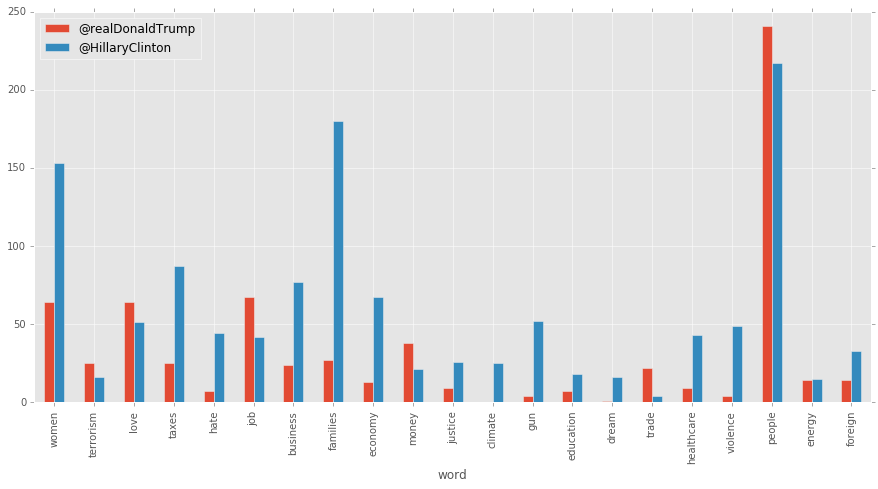

In [12]:
H = DataFrame(score_HillaryClinton).set_index("word")
H.columns = Series(["@HillaryClinton"])
r = DataFrame(score_realDonaldTrump).set_index("word")
r.columns = Series(["@realDonaldTrump"])

concat([r,H], axis=1).plot.bar(figsize  = (15,7))
plt.show()

In [13]:
with open('tweets.json', 'w') as f: #this data file is used in: 
     json.dump({"complete_HillaryClinton": complete_HillaryClinton, 
                "complete_realDonaldTrump": complete_realDonaldTrump,
                "index_HillaryClinton": index_HillaryClinton,
                "index_realDonaldTrump": index_realDonaldTrump,
                "score_HillaryClinton": score_HillaryClinton,
                "score_realDonaldTrump": score_realDonaldTrump,
               "n_HillaryClinton": n_HillaryClinton,
               "n_realDonaldTrump": n_realDonaldTrump}, f)